In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import preprocessing

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
from sklearn.metrics import silhouette_score

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
def df_creater(floc1,floc2):
    Crime = pd.read_csv(floc1)
    Crime = Crime[['DBN','Major N','Oth N','NoCrim N','Prop N','Vio N']]
    Crime['Total N'] = Crime['Major N'] +Crime['Oth N'] +Crime['NoCrim N'] +Crime['Prop N'] + Crime['Vio N']
    Crime = Crime.fillna(0)
    SQR = pd.read_csv(floc2)
    if 'School Type' not in SQR.columns:
        if 'High' in floc2:
            SQR['School type'] = 'High School'
    SQR = SQR[['DBN', 'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index',
       'Percent in Temp Housing', 'Percent HRA Eligible', 'Percent Asian',
       'Percent Black', 'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating','School Type']]

    Crime_merge_SQR = pd.merge(Crime,SQR, on = ['DBN'], how= 'inner')
    #Crime_merge_HQR['TimeStamp'] = '2017-2018'
    Crime_merge_SQR = Crime_merge_SQR.dropna()
    return Crime_merge_SQR

In [5]:
All_school = pd.concat([df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Reports_-_Elem__Middle___K-8.csv'),
                                    df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Report_-_High_School.csv')], axis = 0)
All_school.to_csv('All school.csv')

In [41]:
data = pd.read_csv("All school.csv")
data.head()

,Unnamed: 0,DBN,Major N,Oth N,NoCrim N,Prop N,Vio N,Total N,Enrollment,Rigorous Instruction - Percent Positive,...,Percent of Students Chronically Absent,Teacher Attendance Rate,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,School Type
0,1,22K052,1.0,1.0,0.0,2.0,0.0,4.0,751,0.88,...,0.233,0.966,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Approaching Target,Elementary
1,2,28Q008,0.0,0.0,0.0,0.0,0.0,0.0,339,0.83,...,0.348,0.964,Meeting Target,Meeting Target,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Middle
2,3,13K301,0.0,0.0,0.0,0.0,0.0,0.0,99,0.74,...,0.468,0.965,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Exceeding Target,Meeting Target,Approaching Target,Middle
3,4,14K120,0.0,2.0,3.0,2.0,0.0,7.0,369,0.87,...,0.290,0.963,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Elementary
4,5,28Q174,0.0,0.0,0.0,0.0,0.0,0.0,643,0.77,...,0.147,0.960,Meeting Target,Meeting Target,Meeting Target,Approaching Target,Exceeding Target,Approaching Target,Approaching Target,Elementary


In [42]:
data.shape

(1351, 38)

In [43]:
df_NUM = data.replace({'Rigorous Instruction Rating': {'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Collaborative Teachers Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Supportive Environment Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Effective School Leadership Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Strong Family-Community Ties Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Trust Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Student Achievement Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4}})

In [44]:
df_NUM= df_NUM.iloc[:,2:]
df_NUM=pd.get_dummies(df_NUM)

In [45]:
data = preprocessing.normalize(df_NUM)
print(data.shape)

(1351, 39)


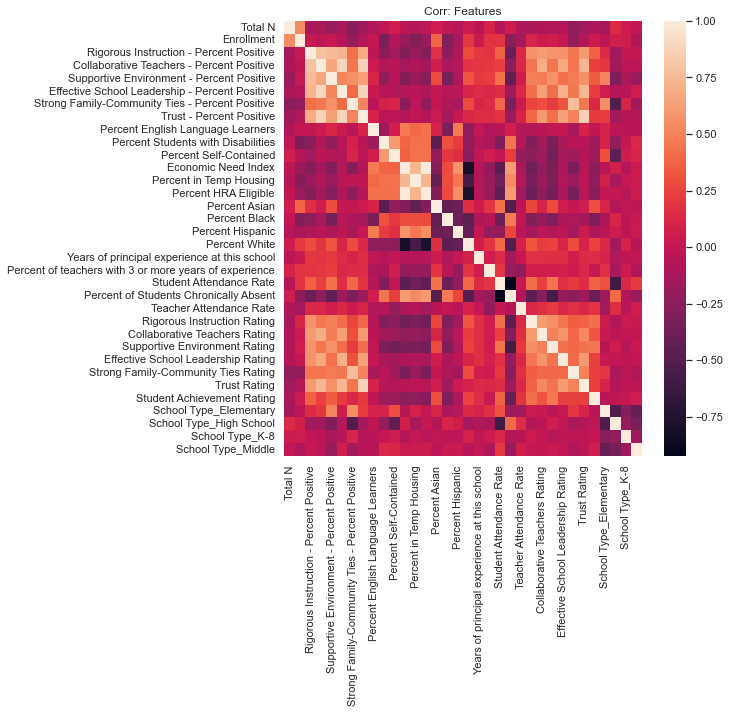

In [46]:
Heat = pd.concat([df_NUM['Total N'],df_NUM.iloc[:,6:39]], axis = 1)

sns.heatmap(Heat.corr()).set(title='Corr: Features')
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(font_scale = 1)

#### Basic

In [47]:
Basic = df_NUM[['Rigorous Instruction - Percent Positive','Collaborative Teachers - Percent Positive',\
         'Supportive Environment - Percent Positive','Effective School Leadership - Percent Positive',\
         'Rigorous Instruction Rating','Collaborative Teachers Rating', 'Supportive Environment Rating']]

#### Education_Quality

In [48]:
Education_Quality = df_NUM[['Years of principal experience at this school','Percent of teachers with 3 or more years of experience','Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate', 'Effective School Leadership Rating']]


####  Economy

In [49]:
Economy = df_NUM[['Strong Family-Community Ties - Percent Positive','Trust - Percent Positive',\
                'Percent Students with Disabilities','Percent Self-Contained','Economic Need Index',\
                'Percent in Temp Housing', 'Percent HRA Eligible', 'Strong Family-Community Ties Rating', 'Trust Rating']]


#### Race

In [50]:
Race = df_NUM[['Percent Asian','Percent Black', 'Percent Hispanic', 'Percent White']]

#### School_type

In [51]:
School_type = df_NUM[['School Type_Elementary','School Type_High School','School Type_K-8','School Type_Middle']]

In [52]:
df_NUM_rf_label = df_NUM.iloc[:,5:]

df_NUM_rf_label0 = df_NUM_rf_label.loc[df_NUM_rf_label['Total N'] == 0]
df_NUM_rf_label0['Total N'] = 'No crime record'
df_NUM_rf_label1 = df_NUM_rf_label.loc[df_NUM_rf_label['Total N'] != 0]
df_NUM_rf_label1['Total N'] = 'With crime record'
rf_ds = pd.concat([df_NUM_rf_label0,df_NUM_rf_label1], axis = 0)
rf_ds

,Total N,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,...,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,School Type_Elementary,School Type_High School,School Type_K-8,School Type_Middle
1,No crime record,339,0.83,0.94,0.69,0.95,0.86,0.92,0.127,0.201,...,3,2,3,2,3,3,0,0,0,1
2,No crime record,99,0.74,0.80,0.69,0.92,0.96,0.84,0.101,0.333,...,3,2,3,4,3,2,0,0,0,1
4,No crime record,643,0.77,0.76,0.88,0.71,0.96,0.78,0.124,0.104,...,3,3,2,4,2,2,1,0,0,0
5,No crime record,384,0.82,0.92,0.84,0.95,0.95,0.97,0.292,0.237,...,3,4,4,4,4,4,1,0,0,0
8,No crime record,781,0.85,0.87,0.77,0.91,0.96,0.90,0.049,0.181,...,3,3,3,4,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,With crime record,309,0.79,0.70,0.65,0.78,0.88,0.80,0.068,0.249,...,2,3,2,3,2,3,0,1,0,0
1342,With crime record,2394,0.74,0.70,0.65,0.69,0.78,0.77,0.168,0.140,...,2,2,2,2,2,2,0,1,0,0
1345,With crime record,1546,0.80,0.80,0.72,0.83,0.84,0.87,0.074,0.169,...,3,3,3,3,3,2,0,1,0,0
1346,With crime record,410,0.73,0.69,0.65,0.49,0.56,0.57,0.020,0.112,...,2,3,2,1,1,3,0,1,0,0


In [60]:
df_set = [Basic,Education_Quality,Economy,Race,School_type]

In [53]:
def get_importance(rf, df, l, ft, yt):
    importance = rf.feature_importances_
    index = np.argsort(importance)[::-1]
    f_label = df.columns
    ul_dic = {}
    for k in range(l):
        upper_label = f_label[index[k]]
        ul_dic[upper_label] = importance[index[k]]
        #print("%2d) %-*s %f"%(k+1, 40, f_label[index[k]],importance[index[k]]))
    F_importance = pd.DataFrame.from_dict(ul_dic,orient='index')
    F_importance.columns = ['importance']
    F_importance.plot.bar(y='importance',use_index = True)
    figname = ft +' vs ' +yt +' Feature Importance'
    plt.savefig(figname)
    #return F_importance

In [54]:
def RF_pipline(df, df2,ct, ft):
    X = df
    Y = df2[ct]
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
    pipeline = Pipeline([
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=50))])

    # we can specify parameters here we want to optimize
    # notice the format - {'model__parameter': range}, this format should follow for all parameters
    parameters = {'RandomForestClassifier__min_samples_split': np.arange(2,10, 1),'RandomForestClassifier__min_samples_leaf': np.arange(2,10, 1)}

    # call the gridsearch method and fit
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3, refit=True)

    grid_search.fit(X_train ,y_train)
    mf = grid_search.best_params_['RandomForestClassifier__min_samples_leaf']
    ms = grid_search.best_params_['RandomForestClassifier__min_samples_split']
    rf = RandomForestClassifier(n_estimators=50, min_samples_split=ms, min_samples_leaf=mf,oob_score=True, random_state=123456)
    rf.fit(X_train ,y_train)
    predicted = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    get_importance(rf,df,X_train.shape[1], ft, ct)
    print(f'Mean accuracy score: {accuracy:.3}')
    return accuracy

In [55]:
import warnings
warnings.filterwarnings("ignore")

Basic
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean accuracy score: 0.626
Education_Quality
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean accuracy score: 0.736
Economy
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean accuracy score: 0.764
Race
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean accuracy score: 0.628
School_type
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean accuracy score: 0.865


{'Basic': 0.625615763546798,
 'Education_Quality': 0.7364532019704434,
 'Economy': 0.7635467980295566,
 'Race': 0.6280788177339901,
 'School_type': 0.8645320197044335}

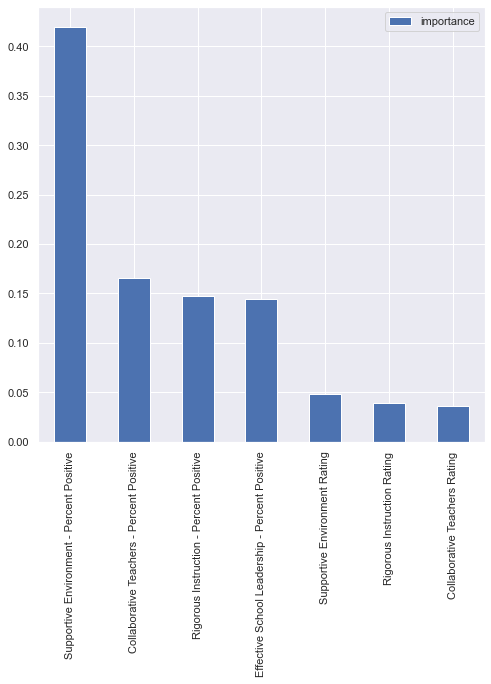

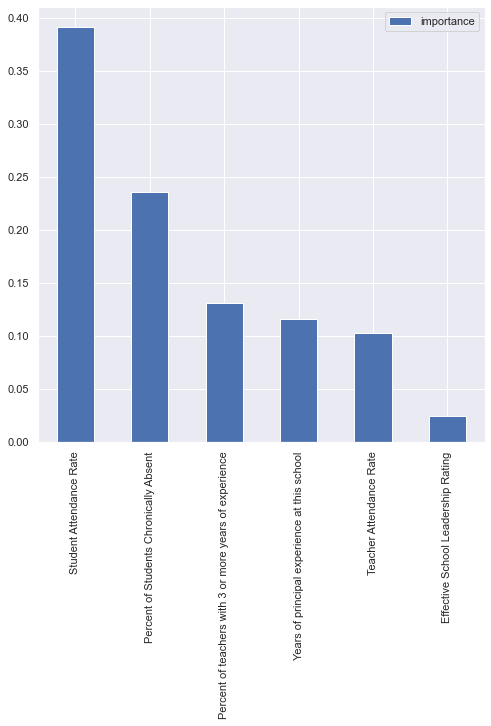

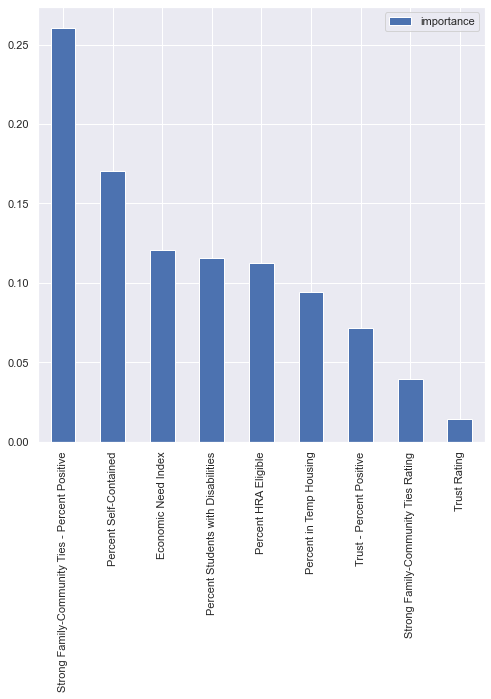

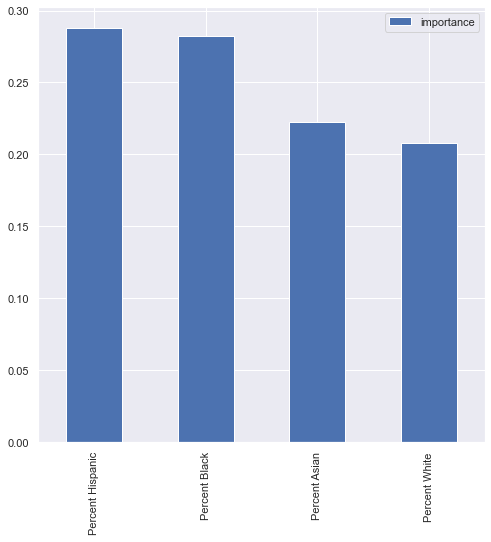

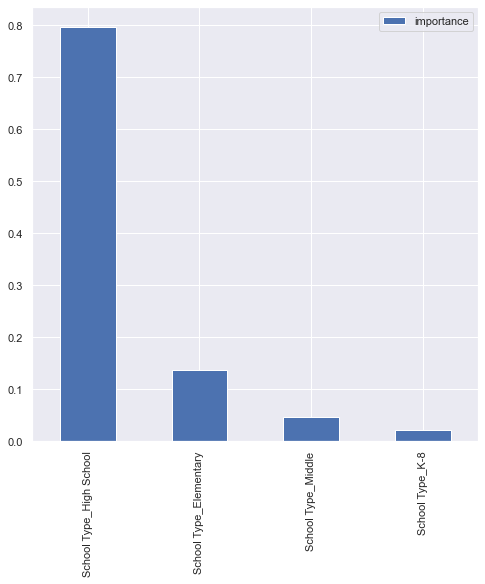

In [61]:
set_name = ['Basic','Education_Quality','Economy','Race','School_type']
index = 0
dic = {}
for df in df_set:
    print(set_name[index])
    score = RF_pipline(df,rf_ds,'Total N', set_name[index])
    dic[set_name[index]]=score
    index += 1
dic

In [66]:
ac = pd.DataFrame(dic,index=[0])
ac = ac.T
ac = ac.reset_index()

In [68]:
ac.colunms = ['Category', 'Accuracy']

In [69]:
ac

,index,0
0,Basic,0.625616
1,Education_Quality,0.736453
2,Economy,0.763547
3,Race,0.628079
4,School_type,0.864532
